# Example code of original quantum phase estimation

## Ideal Simulation

### 3 counting bits 

In [ ]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math
import json
# importing Qiskit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.aer import QasmSimulator

IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
ibmq_qasm_simulator = Aer.get_backend('qasm_simulator')
ibm_oslo_sim  =  QasmSimulator.from_backend(provider.get_backend('ibm_oslo'))

# import basic plot tools
from qiskit.visualization import plot_histogram

In [4]:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

qpe = QuantumCircuit(4, 3)
qpe.x(3)
for qubit in range(3):
    qpe.h(qubit)
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(math.pi/4, counting_qubit, 3); # This is CU
    repetitions *= 2
qpe.barrier()


# Apply inverse QFT
qft_dagger(qpe, 3)
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)


/opt/conda/lib/python3.8/site-packages/qiskit/visualization/circuit/matplotlib.py:163: UserWarning: Style JSON file 'mpl.json' not found in any of these locations: /opt/conda/lib/python3.8/site-packages/qiskit/visualization/circuit/styles/mpl.json, mpl.json. Will use default style.
  self._style, def_font_ratio = load_style(style)


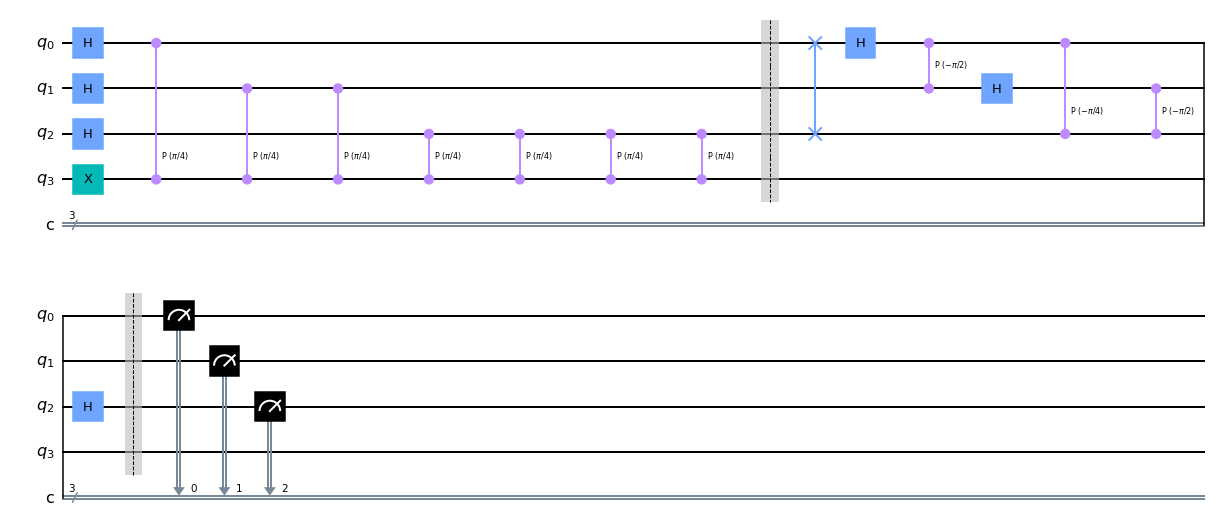

In [5]:
qpe.draw(style = "mpl")

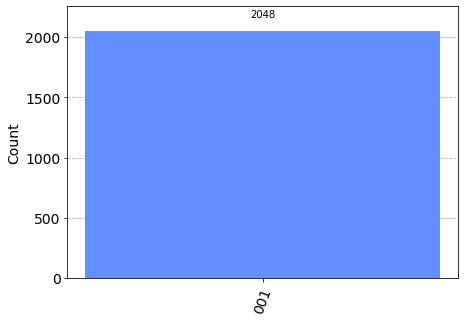

In [6]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

### 5 counting bits 

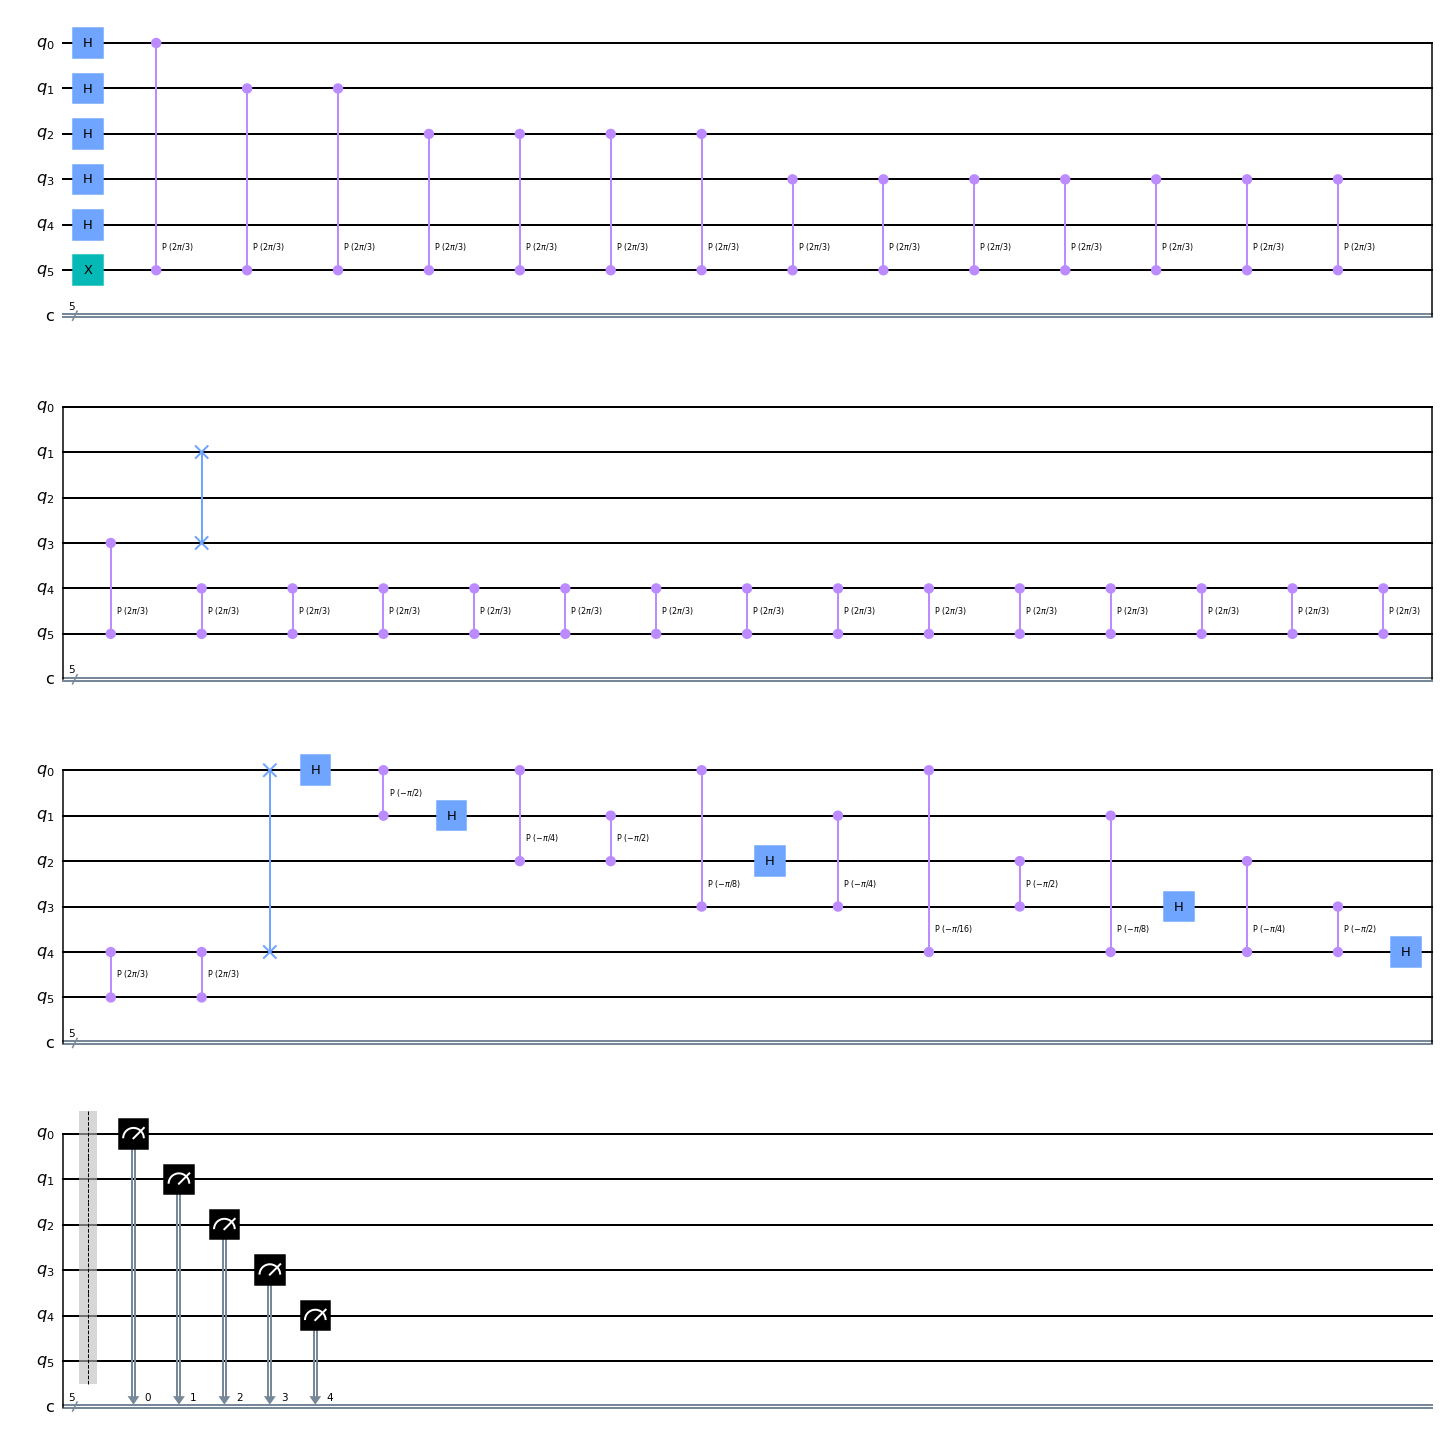

In [7]:
# Create and set up circuit
qpe5 = QuantumCircuit(6, 5)

# Apply H-Gates to counting qubits:
for qubit in range(5):
    qpe5.h(qubit)

# Prepare our eigenstate |psi>:
qpe5.x(5)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe5.cp(angle, counting_qubit, 5);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe5, 5)

# Measure of course!
qpe5.barrier()
for n in range(5):
    qpe5.measure(n,n)

qpe5.draw(output='mpl', fold = 30)

In [8]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe5 = transpile(qpe5, aer_sim)
qobj = assemble(t_qpe5, shots=shots)
results = aer_sim.run(qobj).result()
QPE_result_ideal = results.get_counts()
#plot_histogram(QPE_result_ideal)
print(QPE_result_ideal)

{'11010': 2, '11100': 4, '10011': 5, '10101': 9, '10010': 5, '00010': 7, '00001': 6, '00110': 15, '01001': 109, '00101': 11, '10001': 10, '01000': 32, '01100': 195, '10000': 12, '00100': 13, '01101': 74, '01010': 705, '01011': 2761, '00111': 34, '00011': 3, '01111': 15, '11110': 5, '01110': 31, '10110': 4, '10111': 7, '10100': 6, '11101': 4, '00000': 5, '11001': 2, '11000': 2, '11111': 3}


In [9]:

# should construct a vector with length 2**N 
# such that the element start from 0 to 2**N - 1

count_ = results.get_counts()
probs  = {}
space  = " ".ljust(5, "0")

for output in [format(i, '0'+str(5)+'b') for i in range(2**5)]:
    if output in count_:
        probs[output] = count_[output]/shots
    else:
        probs[output] = 0

prob = [p for basis, p in probs.items()]

print(prob)
print(len(prob))
prob_ground_truth = prob
print(prob_ground_truth)

[0.001220703125, 0.00146484375, 0.001708984375, 0.000732421875, 0.003173828125, 0.002685546875, 0.003662109375, 0.00830078125, 0.0078125, 0.026611328125, 0.172119140625, 0.674072265625, 0.047607421875, 0.01806640625, 0.007568359375, 0.003662109375, 0.0029296875, 0.00244140625, 0.001220703125, 0.001220703125, 0.00146484375, 0.002197265625, 0.0009765625, 0.001708984375, 0.00048828125, 0.00048828125, 0.00048828125, 0, 0.0009765625, 0.0009765625, 0.001220703125, 0.000732421875]
32
[0.001220703125, 0.00146484375, 0.001708984375, 0.000732421875, 0.003173828125, 0.002685546875, 0.003662109375, 0.00830078125, 0.0078125, 0.026611328125, 0.172119140625, 0.674072265625, 0.047607421875, 0.01806640625, 0.007568359375, 0.003662109375, 0.0029296875, 0.00244140625, 0.001220703125, 0.001220703125, 0.00146484375, 0.002197265625, 0.0009765625, 0.001708984375, 0.00048828125, 0.00048828125, 0.00048828125, 0, 0.0009765625, 0.0009765625, 0.001220703125, 0.000732421875]


In [10]:
#print(qpe.depth())
#print(t_qpe.depth())
print("Circuit depth of qpe3  = ", qpe5.depth())
print("Circuit depth of transpiled qpe3  = ", t_qpe5.depth())

Circuit depth of qpe3  =  43
Circuit depth of transpiled qpe3  =  43


## QPE Simulation with noise

In [11]:
qpe_noise = QuantumCircuit(6, 5)
for qubit in range(5):
    qpe_noise.h(qubit)
qpe_noise.x(5)
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe_noise.cp(angle, counting_qubit, 5);
    repetitions *= 2
qft_dagger(qpe_noise, 5)
qpe_noise.barrier()
for n in range(5):
    qpe_noise.measure(n,n)

# Let's see the results!
shots = 4096
t_qpe_noise = transpile(qpe_noise, ibm_oslo_sim)
qobj = assemble(t_qpe_noise, shots=shots)
results = ibm_oslo_sim.run(qobj).result()
QPE_result_noise = results.get_counts()
print(QPE_result_noise)
#plot_histogram(QPE_result_noise)

{'10101': 13, '11000': 34, '10010': 84, '11100': 48, '01111': 59, '11010': 114, '10001': 38, '01001': 171, '00101': 38, '00011': 157, '00111': 79, '01011': 1279, '10000': 63, '01010': 687, '10011': 107, '01110': 76, '01100': 224, '01000': 136, '00001': 31, '00110': 38, '11101': 15, '11011': 201, '11111': 21, '10110': 22, '00000': 33, '11001': 32, '00100': 50, '11110': 24, '00010': 75, '10111': 23, '10100': 25, '01101': 99}


## Real Hardware Result

In [12]:
#Let's see the result
backend = provider.get_backend('ibm_oslo')

# prepare the circuit for the backend
qpe_real = transpile(qpe_noise, backend=backend)
qobj = assemble(qpe_real, backend=backend, shots=4096)

# execute the circuit
job = backend.run(qobj)

/tmp/ipykernel_58/2441727580.py:9: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


In [13]:
job.status()

<JobStatus.INITIALIZING: 'job is being initialized'>

In [14]:
# get result
result = job.result()
QPE_result_real = result.get_counts()
plot_histogram(QPE_result_real)
print(QPE_result_real)

{'00000': 137, '00001': 96, '10000': 136, '10001': 111, '10010': 146, '10011': 117, '10100': 177, '10101': 176, '10110': 166, '10111': 74, '11000': 126, '11001': 115, '11010': 137, '11011': 147, '11100': 149, '11101': 116, '11110': 140, '11111': 101, '00010': 136, '00011': 112, '00100': 184, '00101': 139, '00110': 168, '00111': 89, '01000': 104, '01001': 101, '01010': 134, '01011': 140, '01100': 153, '01101': 106, '01110': 111, '01111': 52}


# Biuld Parametrized Quantum Circuit (VQC)

In [15]:
import itertools

def vqe_ansatz(
    qubits,
    circ,
    parameters,
    layers = 2,
    entangler = "full" # "full" or "linear"
    ):

    for layer in range(layers):

        for iz in range (0, len(qubits)):
            circ.ry(parameters[layer][iz], qubits[iz])
            circ.rz(parameters[layer][iz+len(qubits)], qubits[iz])

        circ.barrier()
        if entangler == "full":
            for i, j in itertools.combinations(qubits, 2):
                circ.cz(qubits[i], qubits[j])

        elif entangler == "linear":
            for i in range(len(qubits)-1):
                circ.cz(qubits[i], qubits[i+1])

        circ.barrier()

    for iz in range (0, len(qubits)):
        circ.ry(parameters[layers][iz], qubits[iz])
        circ.rz(parameters[layers][iz+len(qubits)], qubits[iz])

    #circ.measure_all()
    #circ.measure()
    for n in range(len(qubits)-1):
        circ.measure(n, n)

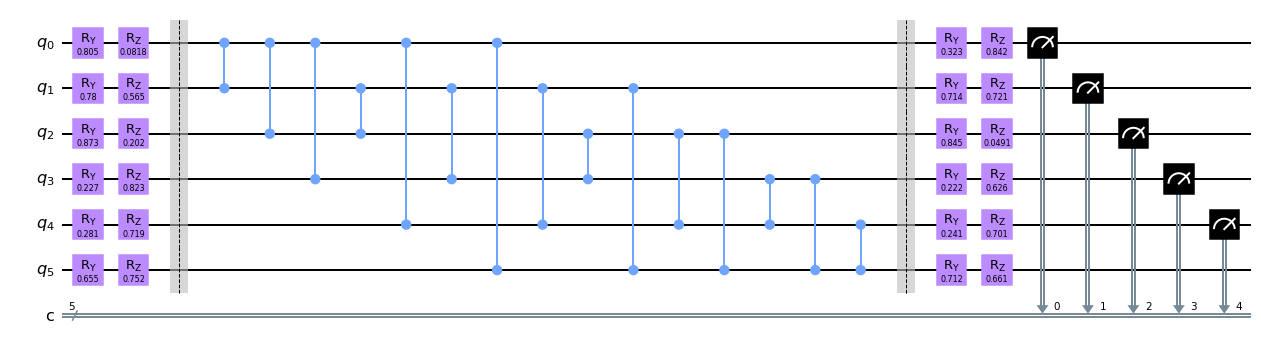

In [16]:
n_qubit = 6
layers  = 1
circ = QuantumCircuit(n_qubit,n_qubit-1)
vqe_ansatz(qubits = list(range(n_qubit)),
           circ = circ,
           parameters = np.random.rand(layers+1, n_qubit*2),
           layers = layers,
           entangler = "full")
circ.draw(output='mpl', fold = 30)


In [17]:
print("Circuit depth of circ = ", circ.depth())

Circuit depth of circ =  14


In [18]:
from scipy.optimize import minimize, basinhopping


def LearnQPE(
    prob_ground_truth, 
    n_qubit = 6, # count the qubit number
    print_eval_num = True,
    backend = aer_sim,
    shots = 4096,
    layers = 1
    ):

    # Implements the entire cost function on the quantum circuit

    global eval_num
    global backend_
    global shots_
    global prob_gt

    prob_gt  = prob_ground_truth
    shots_   = shots
    backend_ = backend
    eval_num = 0

    def prob_optimize(x):
        """
        Input  : Amplitude of subgroups 
        Output : Corresponding energy of full system 
        """
        global prob_gt

        x = np.array(x)
        prob_gt = np.array(prob_gt)

        err = x - prob_gt
        mse = np.sum(np.sqrt(np.power(err, 2)))

        return mse

    def calculate_cost_function(parameters):
        
        global eval_num
        global backend_
        global shots_ 

        parameters = np.reshape(parameters, (layers+1,n_qubit*2))

        circ = QuantumCircuit(
            QuantumRegister(n_qubit),
            ClassicalRegister(n_qubit-1)
            )

        backend = backend_

        vqe_ansatz(
            qubits     = list(range(n_qubit)),
            circ       = circ, 
            parameters = parameters,
            layers     = layers_,
            entangler  = "full"
            )
        
        t_circ = transpile(circ, backend)
        job = backend.run(t_circ, shots = shots_) 

        eval_num += 1
    
        result = job.result()
        count_ = result.get_counts()
        probs  = {}

        for output in [format(i, '0'+str(n_qubit-1)+'b') for i in range(2**(n_qubit-1))]:

            if output in count_:
                probs[output] = count_[output]/shots_
            else:
                probs[output] = 0
        
        prob = [p for basis, p in probs.items()]

        prob_optimize_result = prob_optimize(prob)
        cost_value = prob_optimize_result
        cost_list.append(cost_value)
        
        if print_eval_num == True:
            print("eval", eval_num, ", cost = ", cost_value)

        return cost_value

    cost_list = []
    layers_ = layers

    print("n_qubit = ",n_qubit)
    out = minimize(calculate_cost_function, x0=np.random.rand((layers_+1) * (n_qubit*2)), method="COBYLA", options={'maxiter':500},
                callback = None) 

    return out.x, cost_list

In [19]:
res_x, cost_list = LearnQPE(prob_ground_truth)

n_qubit =  6
eval 1 , cost =  1.857421875
eval 2 , cost =  1.853515625
eval 3 , cost =  1.77978515625
eval 4 , cost =  1.7578125
eval 5 , cost =  1.50634765625
eval 6 , cost =  1.5947265625
eval 7 , cost =  1.42578125
eval 8 , cost =  1.42431640625
eval 9 , cost =  1.43994140625
eval 10 , cost =  1.45263671875
eval 11 , cost =  1.41796875
eval 12 , cost =  1.4423828125
eval 13 , cost =  1.435546875
eval 14 , cost =  1.46044921875
eval 15 , cost =  1.43896484375
eval 16 , cost =  1.52685546875
eval 17 , cost =  1.46630859375
eval 18 , cost =  1.63720703125
eval 19 , cost =  1.4013671875
eval 20 , cost =  1.41015625
eval 21 , cost =  1.41748046875
eval 22 , cost =  1.43115234375
eval 23 , cost =  1.41748046875
eval 24 , cost =  1.43798828125
eval 25 , cost =  1.42041015625
eval 26 , cost =  1.1103515625
eval 27 , cost =  1.25244140625
eval 28 , cost =  1.19873046875
eval 29 , cost =  1.17626953125
eval 30 , cost =  1.32666015625
eval 31 , cost =  1.04541015625
eval 32 , cost =  1.0844726

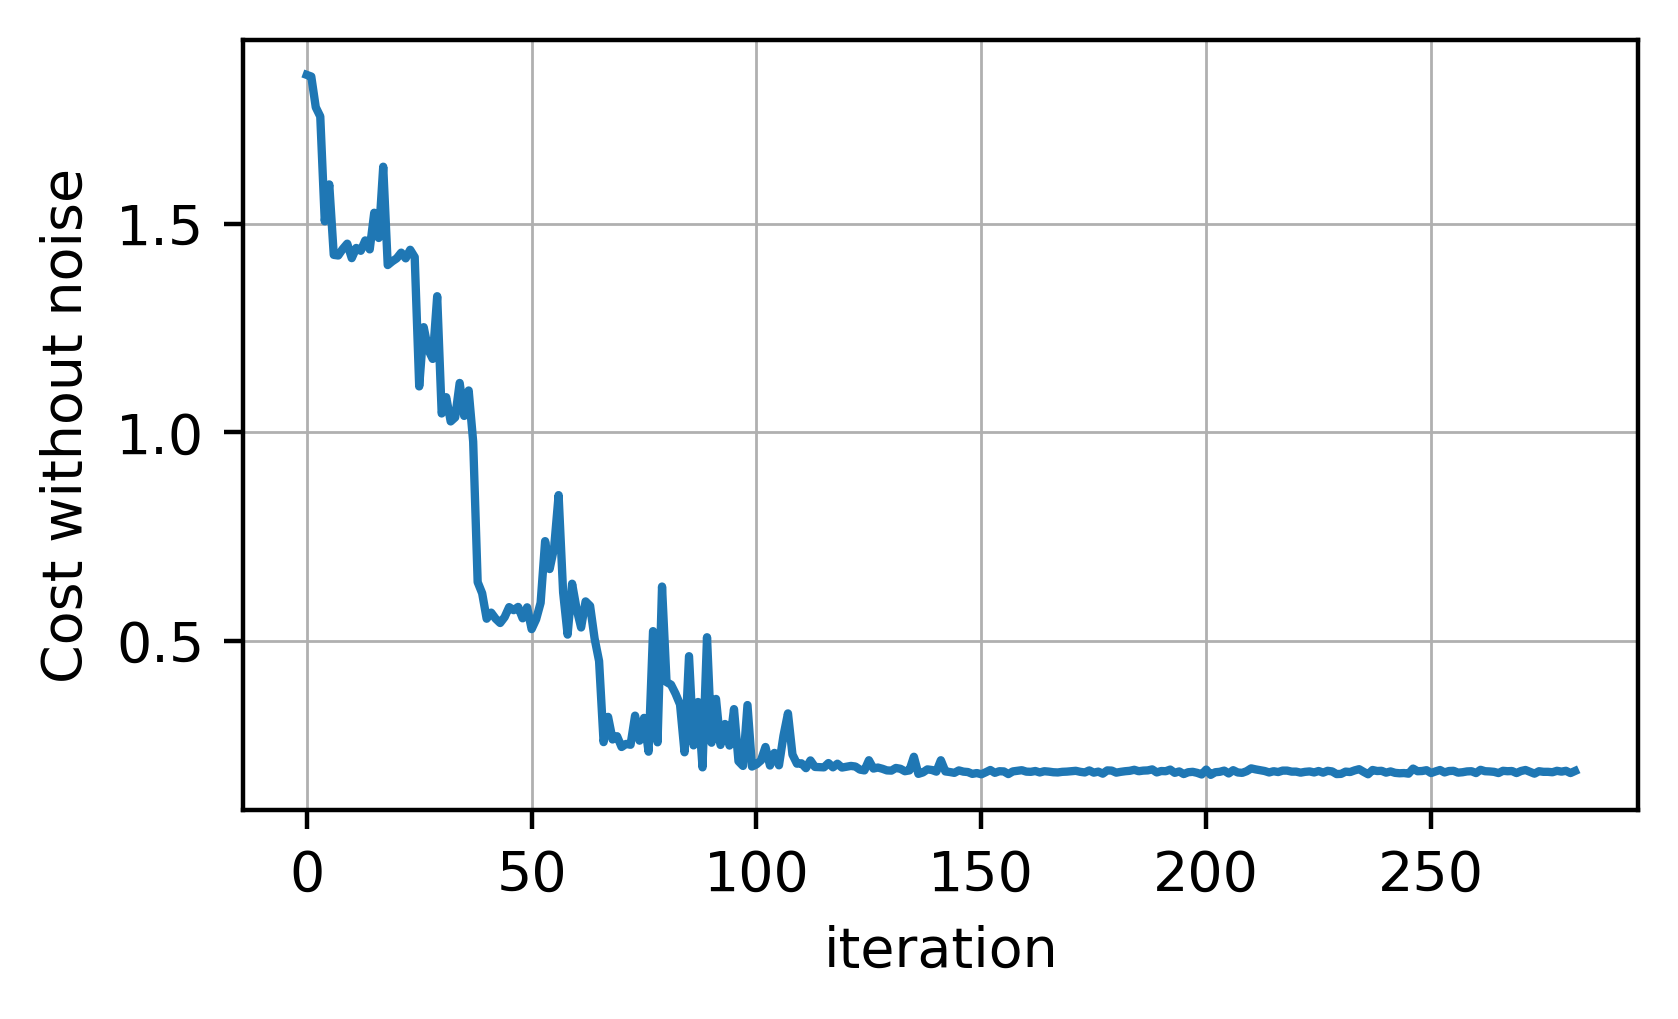

In [20]:
plt.style.use("default")
%config InlineBackend.figure_format='retina'
plt.figure(figsize=(4.5,2.5), dpi = 200)

plt.plot(cost_list) #, label = "cost")

#plt.legend(frameon = True, loc = 4)
plt.ylabel("Cost without noise")
plt.xlabel("iteration")
plt.grid(lw = 0.5)

plt.show()

### trained VQC (ideal)

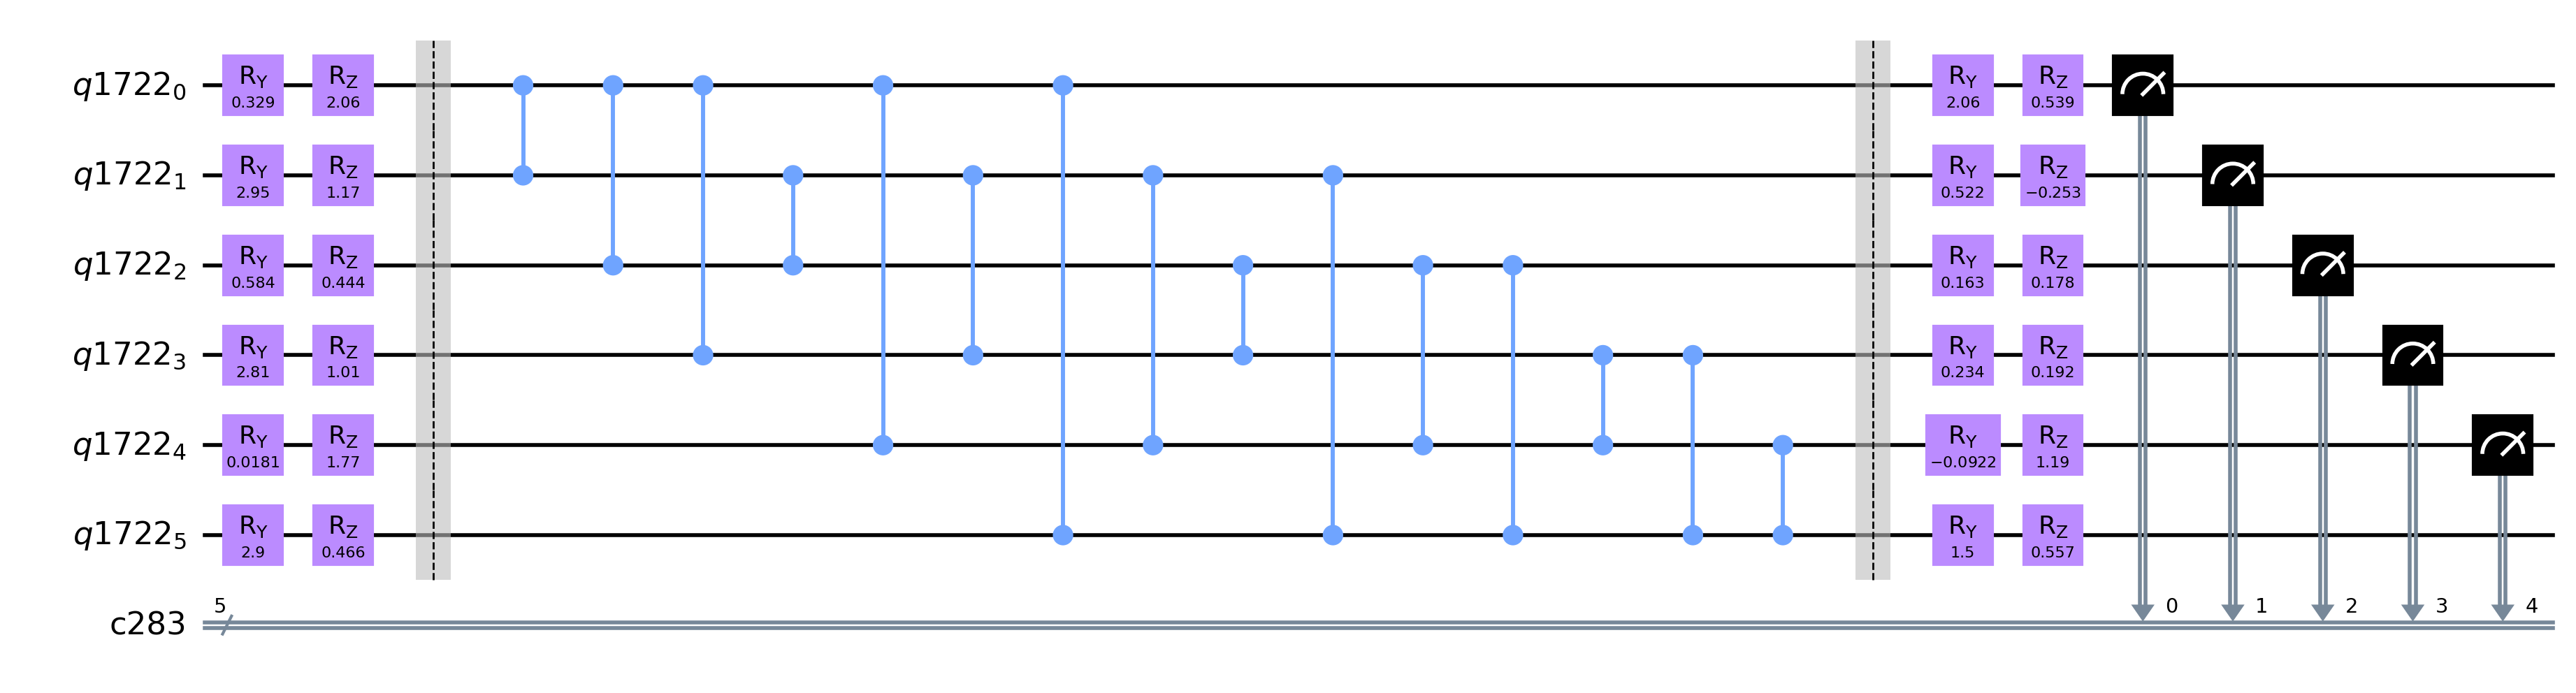

In [21]:
n_qubit = 6
trained_parameters = res_x
layers = 1
parameters = np.reshape(trained_parameters, (layers+1,n_qubit*2))

circ = QuantumCircuit(
    QuantumRegister(n_qubit),
    ClassicalRegister(n_qubit-1)
    )

vqe_ansatz(
    qubits = list(range(n_qubit)),
    circ = circ,
    parameters = parameters,
    layers = layers,
    entangler = "full" # "full" or "linear"
)

circ.draw(output='mpl', fold = 30)



In [22]:
print("Circuit depth of circ = ", circ.depth())

Circuit depth of circ =  14


In [23]:
backend = aer_sim
t_circ = transpile(circ, backend)
job = backend.run(t_circ, shots = shots_) 

result = job.result()
VQC_result_ideal = result.get_counts()
#plot_histogram(VQC_result_ideal)
print(VQC_result_ideal)

{'00001': 6, '01100': 7, '01011': 2828, '00111': 13, '00011': 35, '01010': 766, '11011': 8, '11001': 1, '01101': 9, '00110': 5, '01000': 77, '11010': 1, '01001': 109, '01111': 108, '00000': 7, '00010': 42, '01110': 74}


### VQC noisy simulation

In [24]:
def LearnQPE_noise(
    prob_ground_truth, 
    n_qubit = 6, # count the qubit number
    print_eval_num = True,
    backend = ibm_oslo_sim,
    shots = 4096,
    layers = 1
    ):

    # Implements the entire cost function on the quantum circuit

    global eval_num
    #global backend_
    global shots_
    global prob_gt

    prob_gt  = prob_ground_truth
    shots_   = shots
    backend_ = backend
    eval_num = 0

    def prob_optimize(x):
        """
        Input  : Amplitude of subgroups 
        Output : Corresponding energy of full system 
        """
        global prob_gt

        x = np.array(x)
        prob_gt = np.array(prob_gt)

        err = x - prob_gt
        mse = np.sum(np.sqrt(np.power(err, 2)))

        return mse

    def calculate_cost_function(parameters):
        
        global eval_num
        #global backend_
        global shots_ 

        parameters = np.reshape(parameters, (layers+1,n_qubit*2))

        circ = QuantumCircuit(
            QuantumRegister(n_qubit),
            ClassicalRegister(n_qubit-1)
            )

        #backend = backend_

        vqe_ansatz(
            qubits     = list(range(n_qubit)),
            circ       = circ, 
            parameters = parameters,
            layers     = layers_,
            entangler  = "full"
            )
        
        t_circ = transpile(circ, ibm_oslo_sim)
        job = ibm_oslo_sim.run(t_circ, shots = shots_) 

        eval_num += 1
    
        result = job.result()
        count_ = result.get_counts()
        probs  = {}

        for output in [format(i, '0'+str(n_qubit-1)+'b') for i in range(2**(n_qubit-1))]:

            if output in count_:
                probs[output] = count_[output]/shots_
            else:
                probs[output] = 0
        
        prob = [p for basis, p in probs.items()]

        prob_optimize_result = prob_optimize(prob)
        cost_value = prob_optimize_result
        cost_list_noise.append(cost_value)
        
        if print_eval_num == True:
            print("eval", eval_num, ", cost = ", cost_value)

        return cost_value

    cost_list_noise = []
    layers_ = layers

    print("n_qubit = ",n_qubit)
    out = minimize(calculate_cost_function, x0=np.random.rand((layers_+1) * (n_qubit*2)), method="COBYLA", options={'maxiter':500},
                callback = None) 

    return out.x, cost_list_noise

In [25]:
res_x, cost_list_noise = LearnQPE_noise(prob_ground_truth)

n_qubit =  6
eval 1 , cost =  1.89111328125
eval 2 , cost =  1.87548828125
eval 3 , cost =  1.7958984375
eval 4 , cost =  1.8369140625
eval 5 , cost =  1.67578125
eval 6 , cost =  1.72412109375
eval 7 , cost =  1.697265625
eval 8 , cost =  1.6455078125
eval 9 , cost =  1.66650390625
eval 10 , cost =  1.68603515625
eval 11 , cost =  1.6640625
eval 12 , cost =  1.6474609375
eval 13 , cost =  1.66943359375
eval 14 , cost =  1.669921875
eval 15 , cost =  1.61376953125
eval 16 , cost =  1.6259765625
eval 17 , cost =  1.56005859375
eval 18 , cost =  1.732421875
eval 19 , cost =  1.55126953125
eval 20 , cost =  1.58740234375
eval 21 , cost =  1.5947265625
eval 22 , cost =  1.58056640625
eval 23 , cost =  1.583984375
eval 24 , cost =  1.54736328125
eval 25 , cost =  1.54052734375
eval 26 , cost =  1.3486328125
eval 27 , cost =  1.349609375
eval 28 , cost =  1.375
eval 29 , cost =  1.39013671875
eval 30 , cost =  1.29345703125
eval 31 , cost =  1.2568359375
eval 32 , cost =  1.33935546875
eval 

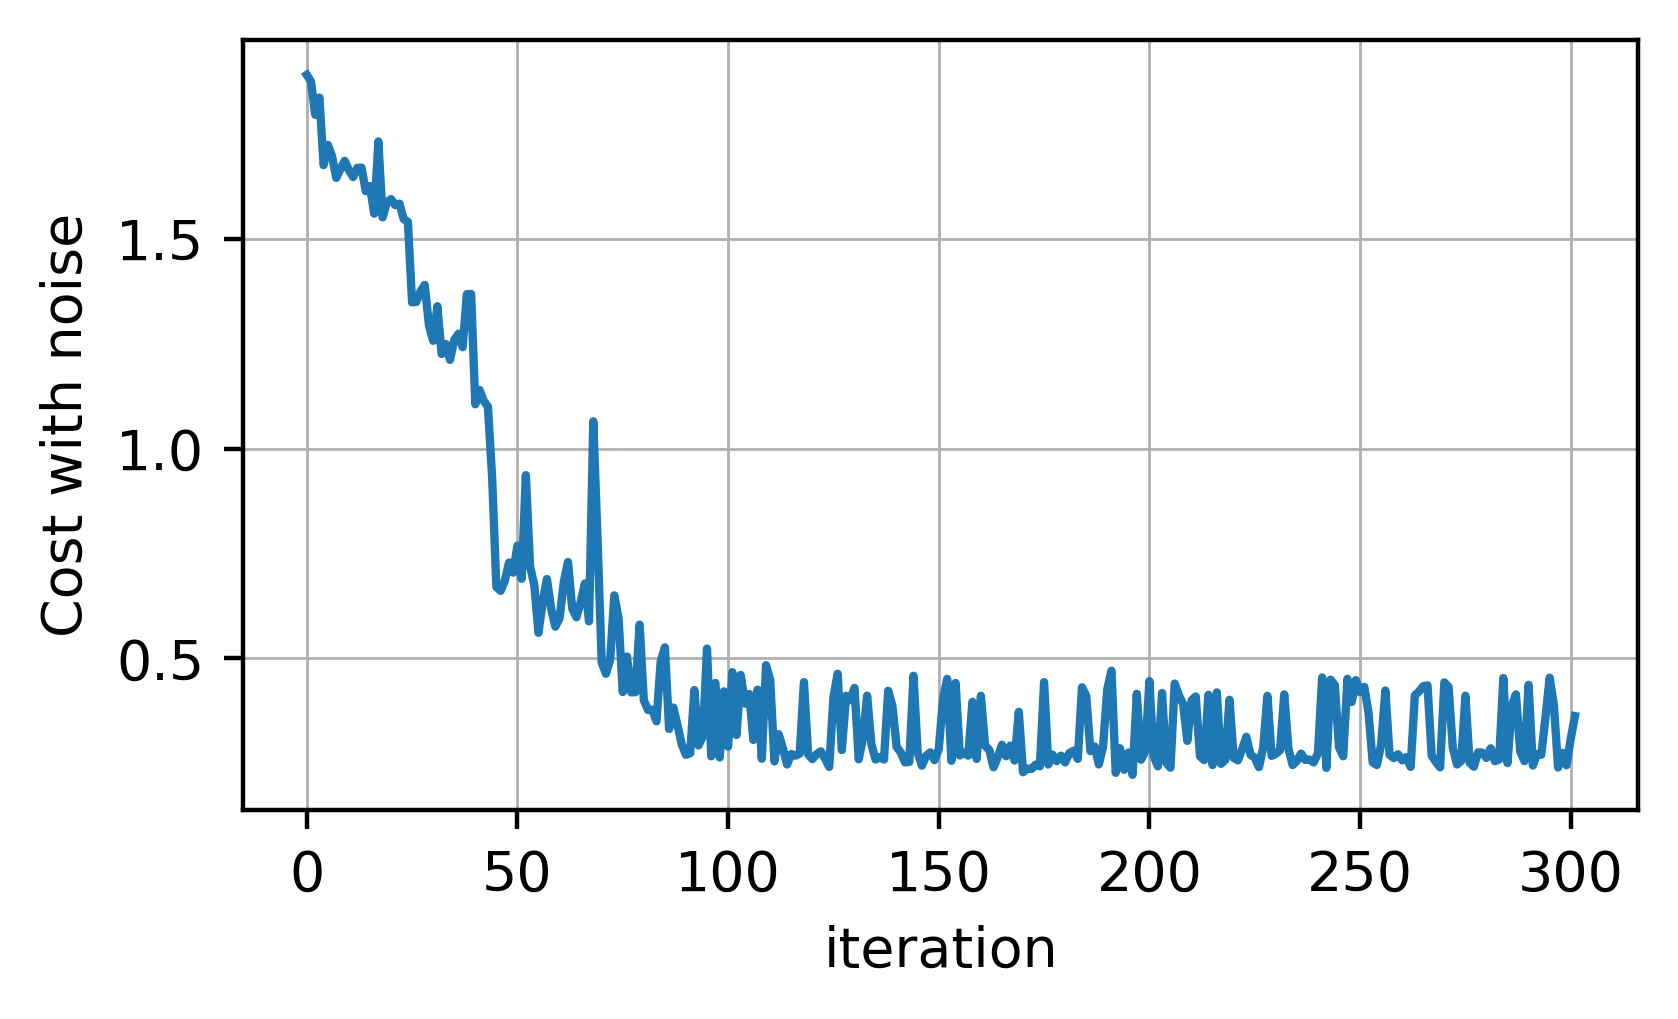

In [26]:
plt.style.use("default")
%config InlineBackend.figure_format='retina'
plt.figure(figsize=(4.5,2.5), dpi = 200)

plt.plot(cost_list_noise) #, label = "cost")

#plt.legend(frameon = True, loc = 4)
plt.ylabel("Cost with noise")
plt.xlabel("iteration")
plt.grid(lw = 0.5)

plt.show()

In [27]:
n_qubit = 6
trained_parameters = res_x
layers = 1
parameters = np.reshape(trained_parameters, (layers+1,n_qubit*2))

VQC_noise = QuantumCircuit(
    QuantumRegister(n_qubit),
    ClassicalRegister(n_qubit-1)
    )

vqe_ansatz(
    qubits = list(range(n_qubit)),
    circ = VQC_noise,
    parameters = parameters,
    layers = layers,
    entangler = "full" # "full" or "linear"
)

t_VQC_noise = transpile(VQC_noise, ibm_oslo_sim)
job = ibm_oslo_sim.run(t_VQC_noise, shots = shots_) 

result = job.result()
VQC_result_noise = result.get_counts()
#plot_histogram(VQC_result_noise)
print(VQC_result_noise)

{'01101': 5, '00000': 3, '11100': 1, '10111': 2, '10010': 3, '00001': 8, '11000': 2, '11111': 5, '00010': 32, '01010': 695, '11011': 153, '11001': 23, '01011': 2652, '00111': 9, '00011': 107, '01110': 15, '10011': 14, '01100': 4, '00110': 1, '01000': 51, '00101': 3, '01001': 176, '11010': 60, '01111': 72}


## VQC noise simulation & hardware computing

In [36]:
res_x, cost_list_noise = LearnQPE_noise(prob_ground_truth)

n_qubit =  6
eval 1 , cost =  1.73828125
eval 2 , cost =  1.75537109375
eval 3 , cost =  1.71484375
eval 4 , cost =  1.70849609375
eval 5 , cost =  1.6513671875
eval 6 , cost =  1.66845703125
eval 7 , cost =  1.580078125
eval 8 , cost =  1.591796875
eval 9 , cost =  1.60546875
eval 10 , cost =  1.58251953125
eval 11 , cost =  1.595703125
eval 12 , cost =  1.59228515625
eval 13 , cost =  1.5654296875
eval 14 , cost =  1.65380859375
eval 15 , cost =  1.53955078125
eval 16 , cost =  1.57958984375
eval 17 , cost =  1.43603515625
eval 18 , cost =  1.65234375
eval 19 , cost =  1.43701171875
eval 20 , cost =  1.44482421875
eval 21 , cost =  1.45751953125
eval 22 , cost =  1.408203125
eval 23 , cost =  1.44580078125
eval 24 , cost =  1.43212890625
eval 25 , cost =  1.42724609375
eval 26 , cost =  1.41796875
eval 27 , cost =  1.443359375
eval 28 , cost =  1.44580078125
eval 29 , cost =  1.50341796875
eval 30 , cost =  1.39404296875
eval 31 , cost =  1.35888671875
eval 32 , cost =  1.27783203125

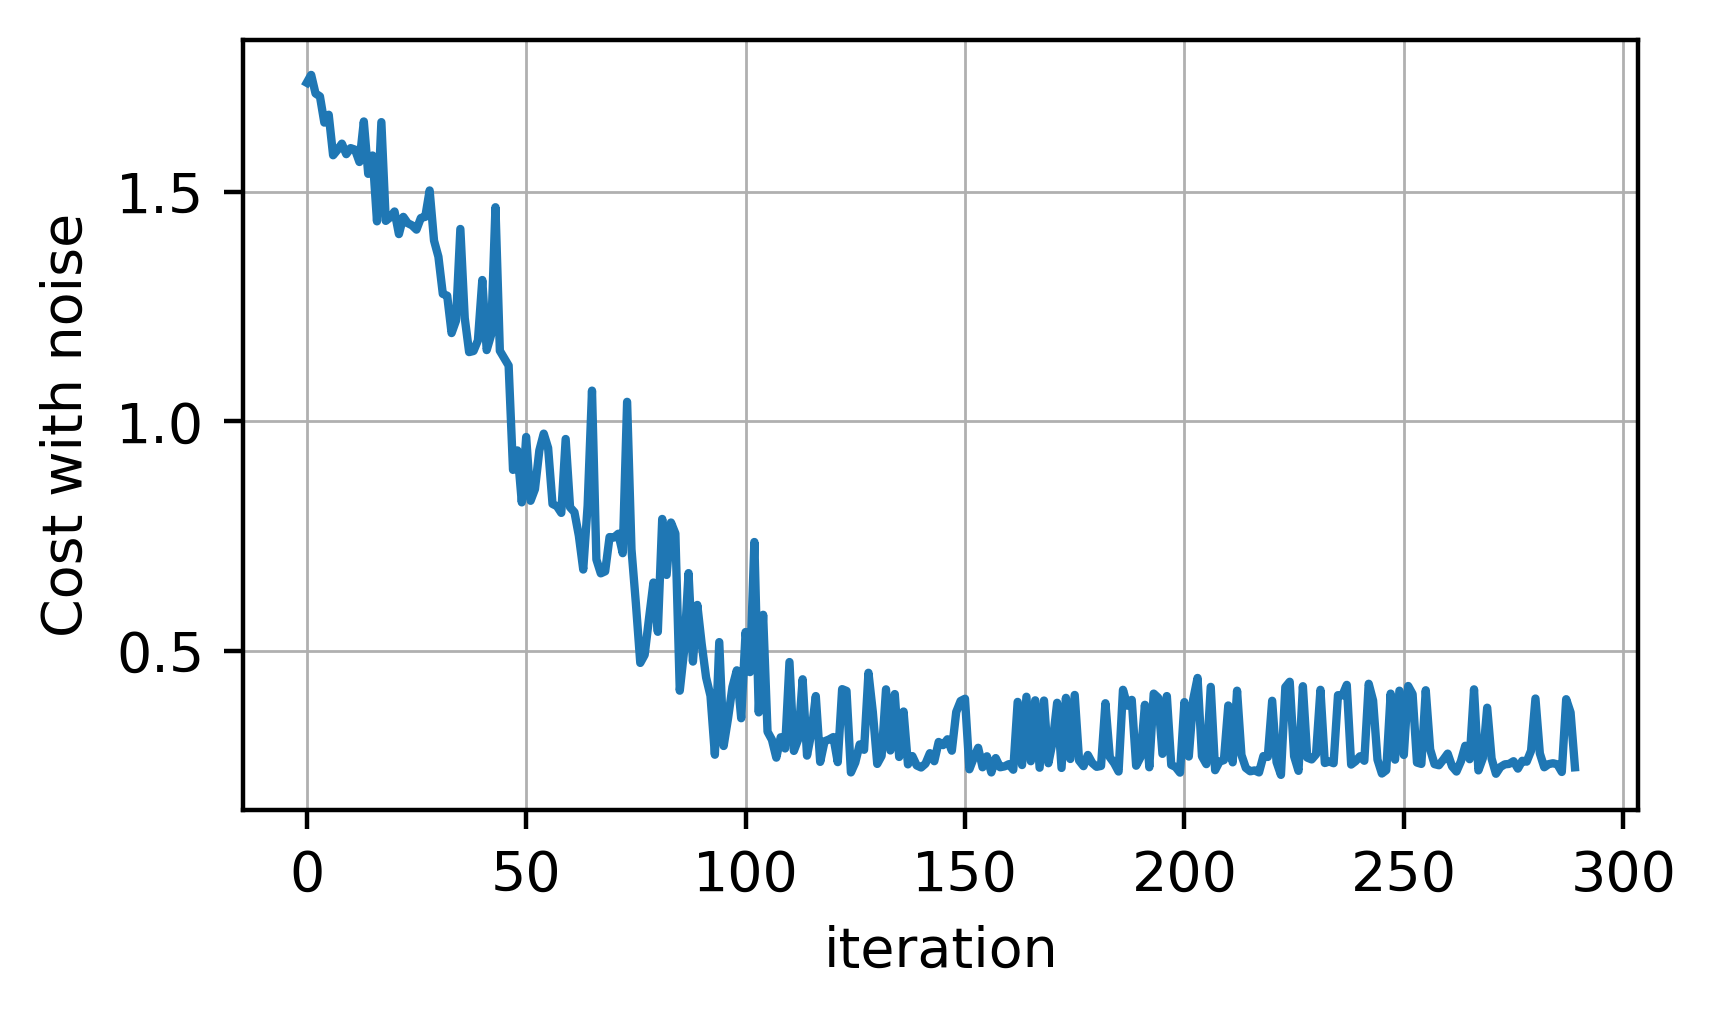

In [37]:
plt.style.use("default")
%config InlineBackend.figure_format='retina'
plt.figure(figsize=(4.5,2.5), dpi = 200)

plt.plot(cost_list_noise) #, label = "cost")

#plt.legend(frameon = True, loc = 4)
plt.ylabel("Cost with noise")
plt.xlabel("iteration")
plt.grid(lw = 0.5)

plt.show()

In [43]:
n_qubit = 6
trained_parameters = res_x
layers = 1
parameters = np.reshape(trained_parameters, (layers+1,n_qubit*2))

VQC_real = QuantumCircuit(
    QuantumRegister(n_qubit),
    ClassicalRegister(n_qubit-1)
    )

vqe_ansatz(
    qubits = list(range(n_qubit)),
    circ = VQC_real,
    parameters = parameters,
    layers = layers,
    entangler = "full" # "full" or "linear"
)

In [44]:
backend = provider.get_backend('ibm_oslo')

# prepare the circuit for the backend
t_VQC_real = transpile(VQC_real, backend=backend)
qobj = assemble(t_VQC_real, backend=backend, shots=4096)

# execute the circuit
job = backend.run(qobj)

In [45]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

In [46]:
result = job.result()
VQC_result_real = result.get_counts()
plot_histogram(VQC_result_real)
print(VQC_result_real)

{'00000': 11, '00001': 35, '10000': 2, '10001': 14, '10010': 12, '10011': 85, '10100': 3, '10101': 3, '10110': 2, '10111': 16, '11000': 7, '11001': 69, '11010': 32, '11011': 290, '11100': 3, '11101': 17, '11110': 12, '11111': 38, '00010': 58, '00011': 273, '00100': 3, '00101': 10, '00110': 11, '00111': 58, '01000': 48, '01001': 221, '01010': 311, '01011': 2220, '01100': 4, '01101': 35, '01110': 29, '01111': 164}


# Summary plot 

In [1]:
QPE_result_ideal = {'11010': 2, '11100': 4, '10011': 5, '10101': 9, '10010': 5, '00010': 7, '00001': 6, '00110': 15, '01001': 109, '00101': 11, '10001': 10, '01000': 32, '01100': 195, '10000': 12, '00100': 13, '01101': 74, '01010': 705, '01011': 2761, '00111': 34, '00011': 3, '01111': 15, '11110': 5, '01110': 31, '10110': 4, '10111': 7, '10100': 6, '11101': 4, '00000': 5, '11001': 2, '11000': 2, '11111': 3}
QPE_result_noise = {'10101': 13, '11000': 34, '10010': 84, '11100': 48, '01111': 59, '11010': 114, '10001': 38, '01001': 171, '00101': 38, '00011': 157, '00111': 79, '01011': 1279, '10000': 63, '01010': 687, '10011': 107, '01110': 76, '01100': 224, '01000': 136, '00001': 31, '00110': 38, '11101': 15, '11011': 201, '11111': 21, '10110': 22, '00000': 33, '11001': 32, '00100': 50, '11110': 24, '00010': 75, '10111': 23, '10100': 25, '01101': 99}
QPE_result_real = {'00000': 137, '00001': 96, '10000': 136, '10001': 111, '10010': 146, '10011': 117, '10100': 177, '10101': 176, '10110': 166, '10111': 74, '11000': 126, '11001': 115, '11010': 137, '11011': 147, '11100': 149, '11101': 116, '11110': 140, '11111': 101, '00010': 136, '00011': 112, '00100': 184, '00101': 139, '00110': 168, '00111': 89, '01000': 104, '01001': 101, '01010': 134, '01011': 140, '01100': 153, '01101': 106, '01110': 111, '01111': 52}

VQC_result_ideal = {'00001': 6, '01100': 7, '01011': 2828, '00111': 13, '00011': 35, '01010': 766, '11011': 8, '11001': 1, '01101': 9, '00110': 5, '01000': 77, '11010': 1, '01001': 109, '01111': 108, '00000': 7, '00010': 42, '01110': 74}
VQC_result_noise = {'01101': 5, '00000': 3, '11100': 1, '10111': 2, '10010': 3, '00001': 8, '11000': 2, '11111': 5, '00010': 32, '01010': 695, '11011': 153, '11001': 23, '01011': 2652, '00111': 9, '00011': 107, '01110': 15, '10011': 14, '01100': 4, '00110': 1, '01000': 51, '00101': 3, '01001': 176, '11010': 60, '01111': 72}
VQC_result_real = {'00000': 11, '00001': 35, '10000': 2, '10001': 14, '10010': 12, '10011': 85, '10100': 3, '10101': 3, '10110': 2, '10111': 16, '11000': 7, '11001': 69, '11010': 32, '11011': 290, '11100': 3, '11101': 17, '11110': 12, '11111': 38, '00010': 58, '00011': 273, '00100': 3, '00101': 10, '00110': 11, '00111': 58, '01000': 48, '01001': 221, '01010': 311, '01011': 2220, '01100': 4, '01101': 35, '01110': 29, '01111': 164}


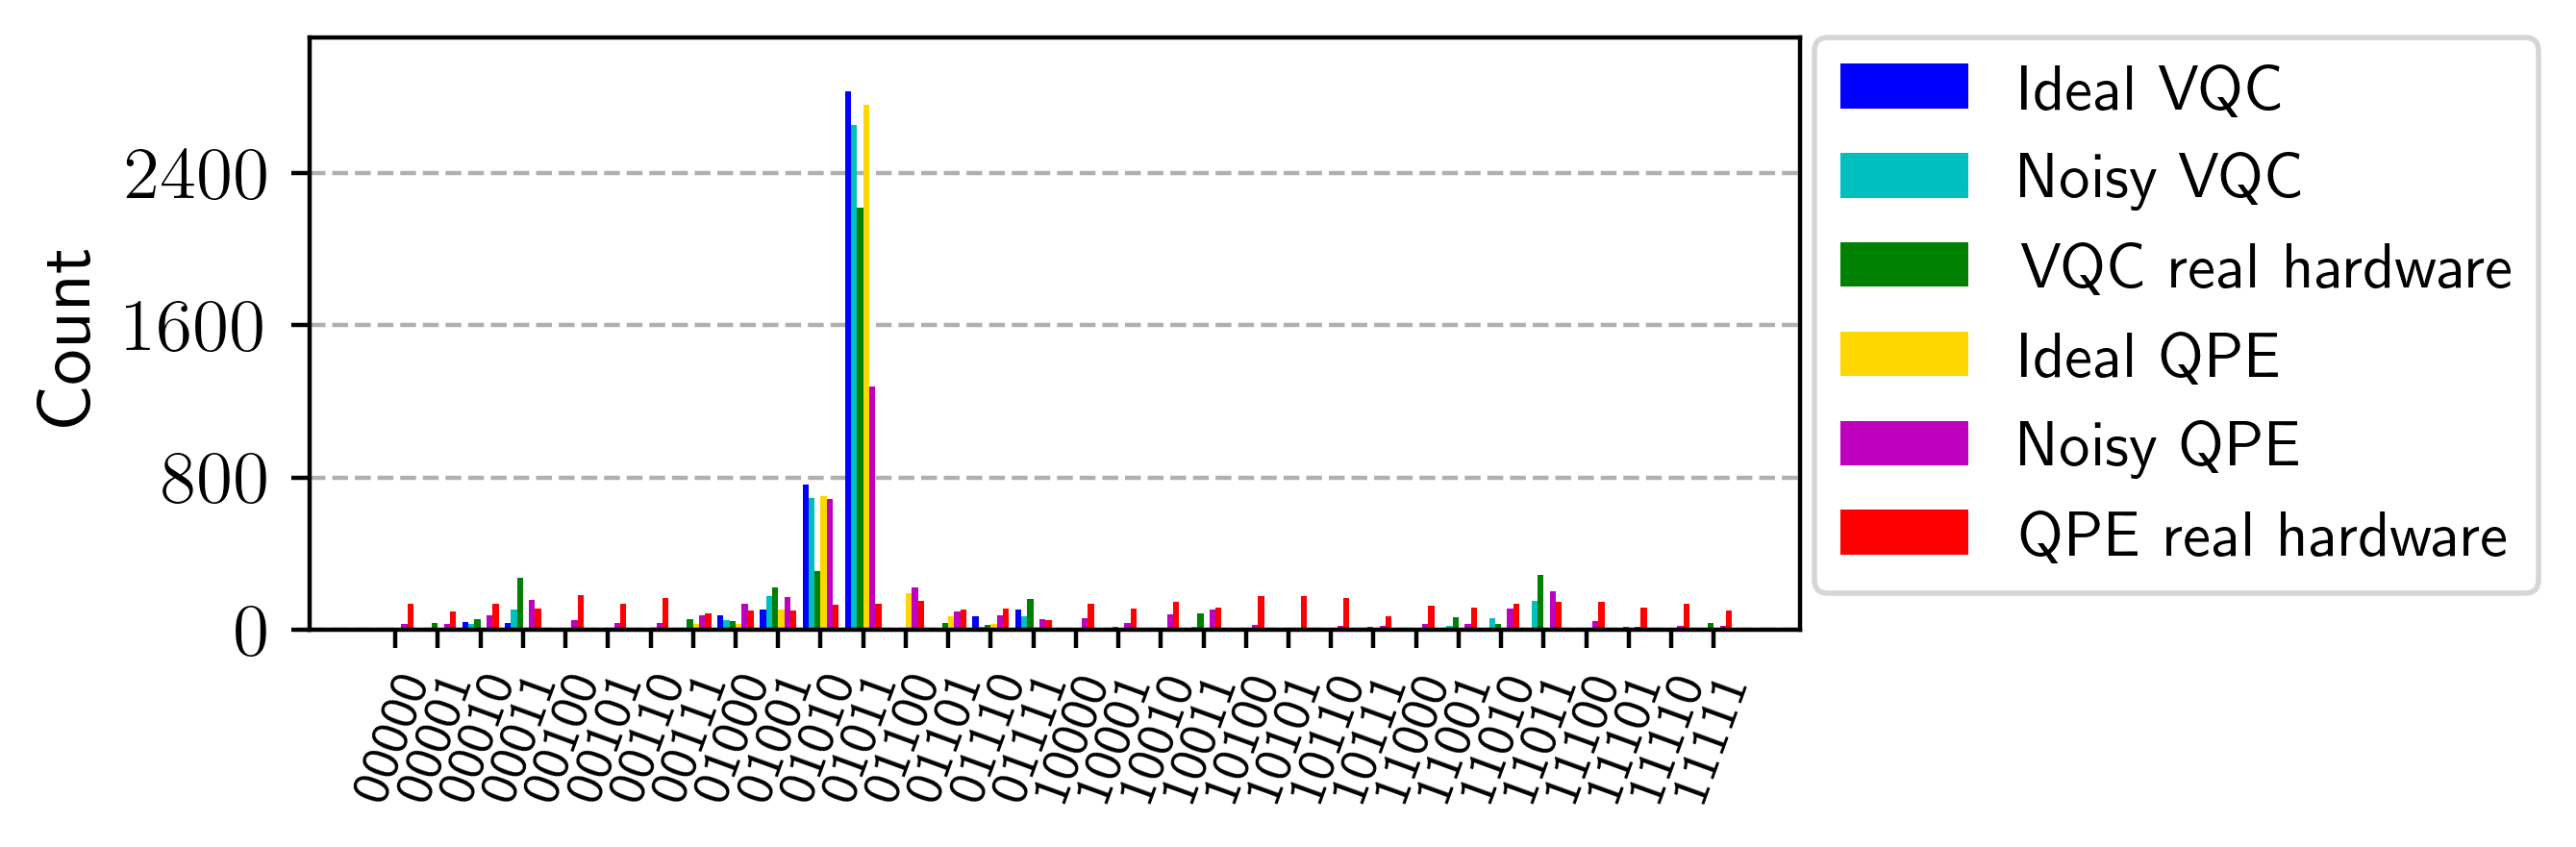

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from qiskit.tools.visualization import plot_histogram
try:
    plt.style.use('quantum-light')
except: pass
%config InlineBackend.figure_format='retina'
plt.rcParams.update({"text.usetex": True})
plt.rcParams["figure.figsize"] = (7,3)
mpl.rcParams["figure.dpi"] = 200
plt.rcParams.update({'font.size': 8})


fig = plt.figure(figsize=(5,2))
ax = fig.add_subplot(1, 1, 1)
plot_histogram([VQC_result_ideal, VQC_result_noise, VQC_result_real, QPE_result_ideal, QPE_result_noise, QPE_result_real], legend = ["Ideal VQC", "Noisy VQC", "VQC real hardware", "Ideal QPE", "Noisy QPE", "QPE real hardware"], color = ['b','c','g','gold','m','r'], bar_labels = False, ax = ax)
#ax.set_ylabel("Probability")
#ax.set_title("$n = 5$")
ax.xaxis.set_tick_params(labelsize=10)
plt.show()

#counts_ideal_N4_grover_list[0]
#plt.show()